In [1]:
import numpy as np
import os
import shutil
from datetime import datetime, timedelta
import pandas as pd
from glob import glob
import xarray as xr
import netCDF4
from scipy.interpolate import griddata

def get_TSMP_grid(file_centre,file_corner):
    grid_centre = xr.open_dataset(file_centre, decode_times=False)
    grid_corner = xr.open_dataset(file_corner)

    lon_edges = np.concatenate((grid_corner.lon.values[:,-1],grid_corner.lon.values[:,0],grid_corner.lon.values[0,:],grid_corner.lon.values[-1,:]))
    lat_edges = np.concatenate((grid_corner.lat.values[:,-1],grid_corner.lat.values[:,0],grid_corner.lat.values[0,:],grid_corner.lat.values[-1,:]))
    lsm_edges = np.zeros(lat_edges.shape)
    
    grid_TSMP = xr.Dataset(data_vars=dict(lon_centre=(['x','y'], grid_centre.lon.values),
                                          lat_centre=(['x','y'], grid_centre.lat.values),
                                          lon_corner=(['xc','yc'], grid_corner.lon.values),
                                          lat_corner=(['xc','yc'], grid_corner.lat.values),
                                          lsm=(['x','y'], grid_centre.LLSM[0].values),
                                          lon_edges=(['ne'], lon_edges),
                                          lat_edges=(['ne'], lat_edges),
                                          lsm_edges=(['ne'], lsm_edges)))
    
    return grid_TSMP

def get_TSMP_coords(file_centre):
    grid_centre = xr.open_dataset(file_centre, decode_times=False)
    grid_TSMP = xr.Dataset(data_vars=dict(lon_centre=(['x','y'], grid_centre.lon.values),
                                          lat_centre=(['x','y'], grid_centre.lat.values),
                                          lsm=(['x','y'], grid_centre.LLSM[0].values)))
    return grid_TSMP
    
def parse_datetime_clm(files):
    dates = []
    for file_ in files:
        date_ = pd.to_datetime(os.path.basename(file_).split('h0.')[1].split('.nc')[0][0:10]) + timedelta(seconds=int(os.path.basename(file_).split('h0.')[1].split('.nc')[0][11:]))
        dates.append(date_)
    return dates
    
    
def parse_datetime_smap(files):
    dates = []
    for file_ in files:
        date_ = pd.to_datetime(os.path.basename(file_).split('P_E_')[1].split('_')[0]) + timedelta(hours=12)
        dates.append(date_)
    return dates

def read_SMAP(file_):
    ncf = netCDF4.Dataset(file_)
    group_pm = ncf.groups.get('Soil_Moisture_Retrieval_Data_PM')
    group_am = ncf.groups.get('Soil_Moisture_Retrieval_Data_AM')

    data_pm = xr.open_dataset(xr.backends.NetCDF4DataStore(group_pm))
    data_am = xr.open_dataset(xr.backends.NetCDF4DataStore(group_am))

    return data_am, data_pm

In [3]:
folder_SMAP = '/p/scratch/cjibg36/kaandorp2/data/SMAP/'

files_clm = ['/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-04-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-07-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-10-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-13-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-16-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-19-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-22-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-25-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-28-43200.nc',
 '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000/R001/run_20190101-20190131/clm.clm2.h0.2019-01-31-43200.nc']

dates_TSMP = [pd.Timestamp('2019-01-04 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-07 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-10 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-13 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-16 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-19 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-22 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-25 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-28 12:00:00', freq='3D'),
 pd.Timestamp('2019-01-31 12:00:00', freq='3D')]


date_results_iter = [[pd.Timestamp('2019-01-01 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-04 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-07 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-10 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-13 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-16 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-19 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-22 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-25 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-28 12:00:00', freq='3D'),
  pd.Timestamp('2019-01-31 12:00:00', freq='3D')]]

/tmp/ipykernel_21405/2567764877.py:14: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  dates_TSMP = [pd.Timestamp('2019-01-04 12:00:00', freq='3D'),
/tmp/ipykernel_21405/2567764877.py:15: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2019-01-07 12:00:00', freq='3D'),
/tmp/ipykernel_21405/2567764877.py:16: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2019-01-10 12:00:00', freq='3D'),
/tmp/ipykernel_21405/2567764877.py:17: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2019-01-13 12:00:00', freq='3D'),
/tmp/ipykernel_21405/2567764877.py:18: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2019-01-16 12:00:00', freq='3D'),
/tmp/ipykernel_21405/25677

In [69]:
class operator_clm_SMAP:
    
    def __init__(self,file_lsm,file_corner):
   
        # 1) get TSMP grid: is used to select SMAP results falling withing this domain. A corner file is required to discard points outside of the domain       
        self.grid_TSMP = get_TSMP_grid(file_lsm,file_corner)   

    def flatten_y(self,y_in):
        # flatten dict with values into a np.array
        y_out = np.array([])
        for val in y_in.values():
            y_out = np.append(y_out,val)        
        return y_out
        
    def get_measurements(self,date_results_iter):
        self.lons_out = {}
        self.lats_out = {}
        self.sm_out = {}


        for date_results in date_results_iter:
            for date_ in date_results[1:]:

                # 2) get all available SMAP dates
                files_SMAP = sorted(glob(os.path.join(folder_SMAP,'nc_%4.4i/*.nc'%date_.year)))
                dates_SMAP = parse_datetime_smap(files_SMAP)

                # 3) for the given model date (date_) get the corresponding SMAP data
                i_closest = np.argmin(np.abs(pd.to_datetime(dates_SMAP) - date_))
                assert abs(dates_SMAP[i_closest] - date_) < timedelta(days=1), 'Measurement and model output differ more than a day, TO DO: implement if statement to avoid'
                file_SMAP = files_SMAP[i_closest]
                data_SMAP_am, data_SMAP_pm = read_SMAP(file_SMAP)

                # 4) select valid datapoints where the soil moisture and location are given
                mask_data_valid = ~np.isnan(data_SMAP_am.soil_moisture) & ~np.isnan(data_SMAP_am.longitude) 

                # 5) Select valid points: valid data, and within the given TSMP domain
                sm = data_SMAP_am.soil_moisture.where(mask_data_valid).values[mask_data_valid]
                lons = data_SMAP_am.longitude.where(mask_data_valid).values[mask_data_valid]
                lats = data_SMAP_am.latitude.where(mask_data_valid).values[mask_data_valid]

                # poor man's check that measurement points are on land and lie within the TSMP domain... There might be a better solution for this (convex hull check on EU-11 polygon?) 
                mask_SMAP_lsm = griddata((np.concatenate((self.grid_TSMP.lon_centre.values.ravel(),self.grid_TSMP.lon_edges)),np.concatenate((self.grid_TSMP.lat_centre.values.ravel(),self.grid_TSMP.lat_edges))),
                                         np.concatenate((self.grid_TSMP.lsm.values.ravel(),self.grid_TSMP.lsm_edges)),
                                         (lons,lats),method='nearest') == 2

                self.lons_out[date_] = lons[mask_SMAP_lsm]
                self.lats_out[date_] = lats[mask_SMAP_lsm]
                self.sm_out[date_] = sm[mask_SMAP_lsm]
        return self.flatten_y(self.sm_out)
                
    def interpolate_model_results(self,i_real,settings_run):
        self.data_TSMP_i = {}
        files_clm = sorted(glob(os.path.join(settings_run['dir_iter'],'R%3.3i/**/clm.clm2.h0.*.nc'%i_real)))
        assert len(files_clm) == len(self.sm_out.keys()), 'Something might have gone wrong in realization %i: not every date has a matching file'

        for i1,date_ in enumerate(self.sm_out.keys()):
            file_clm = sorted(glob(os.path.join(settings_run['dir_iter'],'R%3.3i/**/clm.clm2.h0.*.nc'%i_real)))[i1]
            # print(date_,file_clm)

            data_TSMP = xr.open_dataset(file_clm)
            # add curvilinear lon/lat 
            data_TSMP = data_TSMP.assign_coords(lon_c=(('lat','lon'), self.grid_TSMP.lon_centre.values))
            data_TSMP = data_TSMP.assign_coords(lat_c=(('lat','lon'), self.grid_TSMP.lat_centre.values))

            self.data_TSMP_i[date_] = griddata((data_TSMP.lon_c.values.ravel(),data_TSMP.lat_c.values.ravel()),data_TSMP.H2OSOI[0,0].values.ravel(),(self.lons_out[date_],self.lats_out[date_]), method='nearest')

        return self.flatten_y(self.data_TSMP_i)


In [73]:
file_lsm = '/p/project/cjibg36/kaandorp2/TSMP_setups/static/EUR-11_TSMP_FZJ-IBG3_111x108_LAND-LAKE-SEA-MASK.nc'
file_corner = '/p/project/cjibg36/kaandorp2/TSMP_setups/static/EUR-11_111x108_corners.nc'
operator = operator_clm_SMAP(file_lsm,file_corner)
y_meas = operator.get_measurements(date_results_iter)
y_model = operator.interpolate_model_results(1,settings_run)

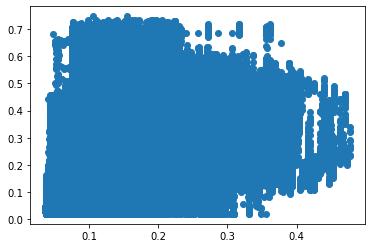

In [75]:
plt.figure()
plt.plot(y_model,y_meas,'o')

In [66]:
out.shape

(514833,)

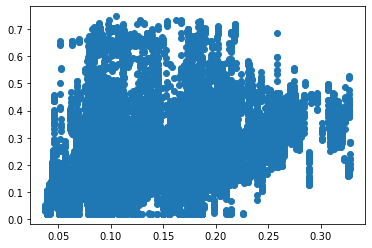

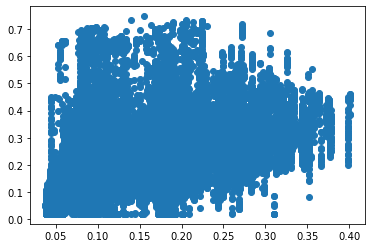

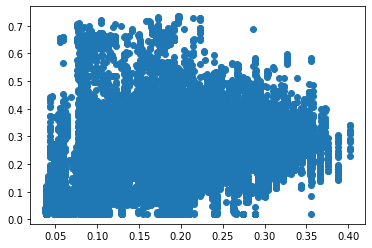

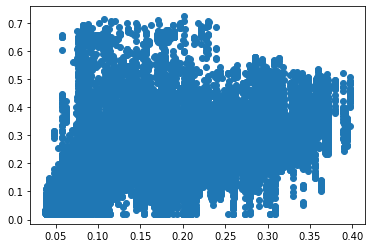

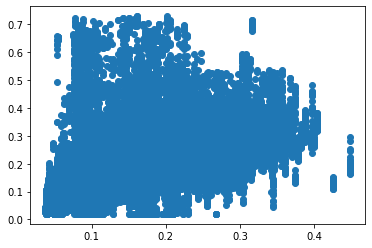

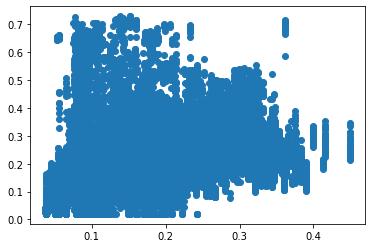

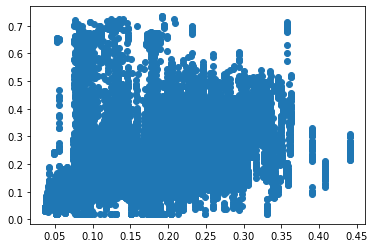

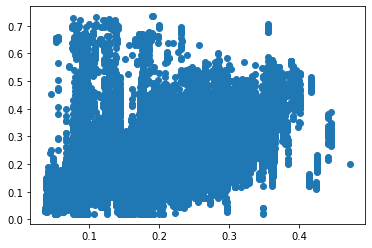

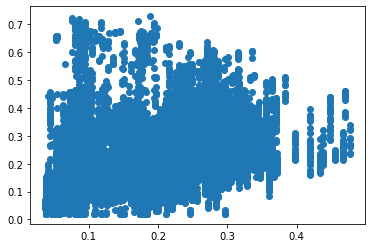

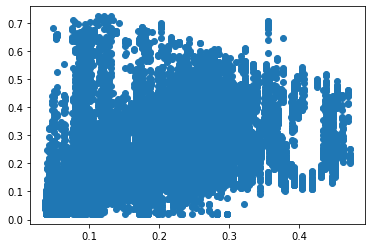

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

for date_ in date_results_iter[0][1:]:
# date_ = date_results_iter[0]
    plt.figure()
    plt.plot(y_model[date_],operator.sm_out[date_],'o')

In [32]:
settings_run = {'dir_forcing': '/p/scratch/cjibg36/kaandorp2/data/ERA5_EUR-44_CLM',
 'dir_setup': '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108',
 'dir_build': '/p/project/cjibg36/kaandorp2/TSMP_patched/',
 'dir_binaries': '/p/project/cjibg36/kaandorp2/TSMP_patched/bin/JUWELS_3.1.0MCT_clm-pfl',
 'dir_store': None,
 'dir_template': '/p/project/cjibg36/kaandorp2/TSMP_setups/setup_DA_tsmp_cordex_111x108/',
 'spinup': False,
 'init_restart': False,
 'dir_DA': '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/input_DA',
 'dir_iter': '/p/scratch/cjibg36/kaandorp2/TSMP_results/TSMP_patched/DA_tsmp_cordex_111x108/20190101-20190131/i000'}

In [42]:
date_ = date_results_iter[0][1]
date_

Timestamp('2019-01-04 12:00:00', freq='3D')

In [26]:
sm_out

NameError: name 'sm_out' is not defined

In [31]:
file_clm = files_clm[i_date]

data_TSMP = xr.open_dataset(file_clm)
# add curvilinear lon/lat for easy plotting
data_TSMP = data_TSMP.assign_coords(lon_c=(('lat','lon'), grid_TSMP.lon_centre.values))
data_TSMP = data_TSMP.assign_coords(lat_c=(('lat','lon'), grid_TSMP.lat_centre.values))

data_TSMP_i = griddata((data_TSMP.lon_c.values.ravel(),data_TSMP.lat_c.values.ravel()),data_TSMP.H2OSOI[0,0].values.ravel(),(lons,lats), method='nearest')


AttributeError: 'Timestamp' object has no attribute 'to_datetime'

In [32]:
pd.to_datetime(date_)

Timestamp('2019-01-04 12:00:00', freq='3D')